In [1]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools')

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ensembles = [
    Ensemble('PED00156e001', database='ped'), #The ensemble derived from Random pool
    Ensemble('PED00157e001', database='ped'), #The ensemble derived from Experimental pool
    Ensemble('PED00158e001', database='ped')
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

featurization_params = {'featurization': "phi_psi"}
reduce_dim_params = {'method': "dimenfix", 'range_n_clusters':[2, 3, 4, 5, 6]}

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
analysis = EnsembleAnalysis(ensembles, data_dir)

analysis.load_trajectories()

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x7aa91c243590>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x7aa8cf7ce550>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x7aa8cf960ad0>}

In [5]:
analysis.extract_features(featurization='rmsd')

array([[0.        , 1.10300577, 0.70661741, ..., 1.56968689, 1.41550899,
        1.81672907],
       [1.10300589, 0.        , 0.84244674, ..., 1.57441878, 1.36523402,
        1.87511563],
       [0.70661741, 0.84244692, 0.        , ..., 1.55786622, 1.41383207,
        1.79397023],
       ...,
       [1.56968677, 1.57441878, 1.55786622, ..., 0.        , 1.0549314 ,
        1.27102983],
       [1.41550899, 1.36523402, 1.41383207, ..., 1.05493045, 0.        ,
        1.2355721 ],
       [1.81672907, 1.87511563, 1.79397023, ..., 1.27103078, 1.23557162,
        0.        ]])

In [9]:
analysis.reduce_features(method='umap' ,n_neighbors=[20,30,40],range_n_clusters= [2,3, 4, 5 ,6 ], num_dim=2);


Concatenated featurized ensemble shape: (288, 1769)
UMAP is running...
Best number of neighbors: 30
Best number of clusters : 3


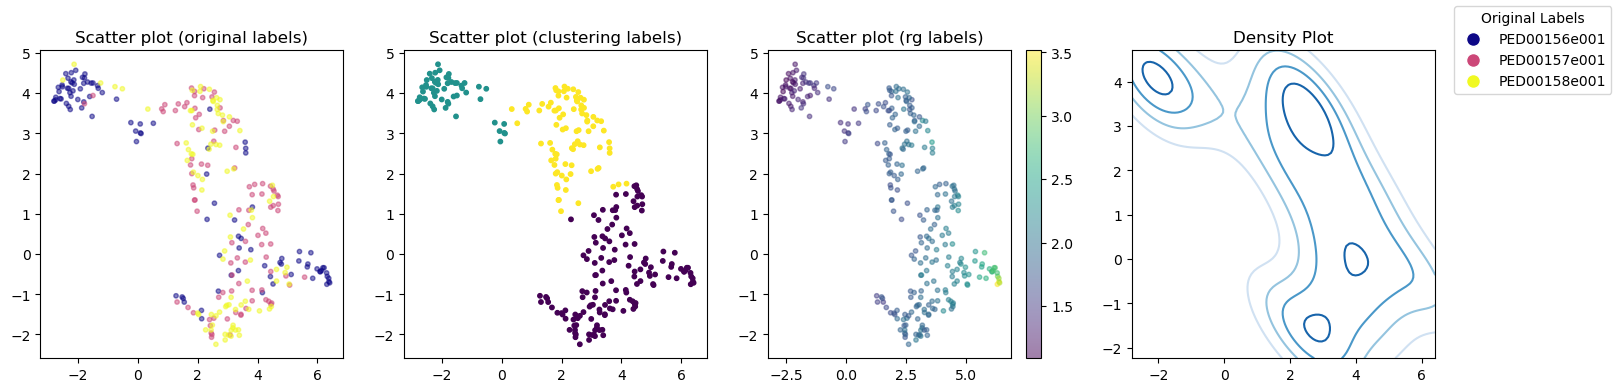

In [10]:
vis = Visualization(analysis)
vis.dimensionality_reduction_scatter(color_by="rg", save=True, n_comp=2, plotly=True, kde_by_ensemble=False)